## Internal Data

데이터셋을 성공적으로 불러왔습니다. 총 688개의 행이 있습니다.

--- 데이터셋 처음 5행 ---
                                             img_dcm  \
0  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...   
1  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...   
2  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...   
3  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...   
4  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...   

                                            png_path            filename  \
0  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...  0331053168.1.1.dcm   
1  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...  0431003035.1.1.dcm   
2  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...  0431003055.1.1.dcm   
3  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...  0431003202.1.1.dcm   
4  /workspace/yeonsu/0.Projects/Pneumoperitoneum/...  0431003452.1.1.dcm   

       XR_id     Pt ID Patient_Sex Patient_Age  Patient_Age_Days  \
0  331053168  29261387           M          3M                90   
1  431003035 

C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\1729985034.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '161 (59.0%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\1729985034.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8 (2.9%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\1729985034.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '104 (38.1%)' has dtype incompatible with int64, please explicitly cast to a compatible d

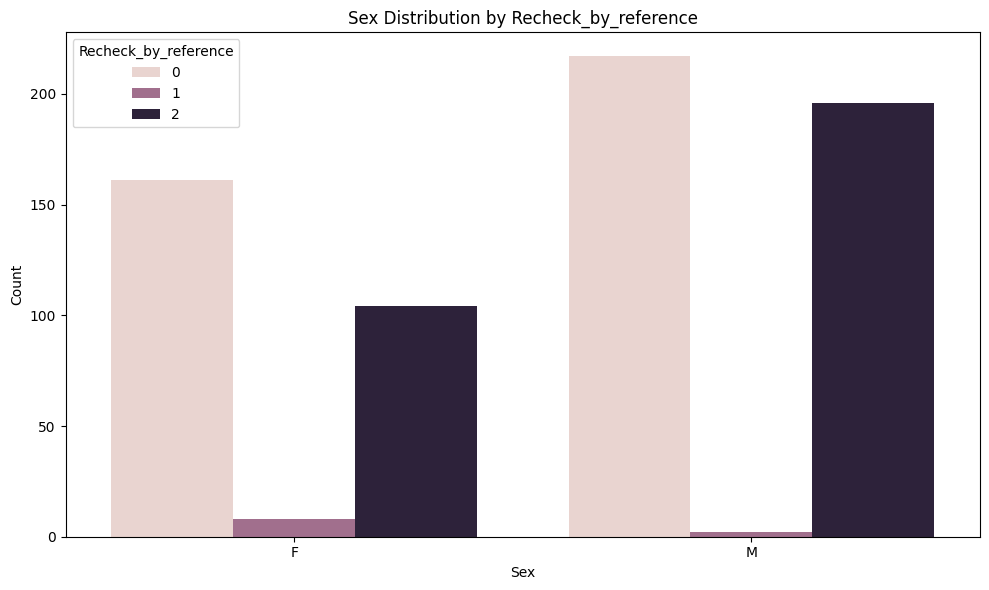

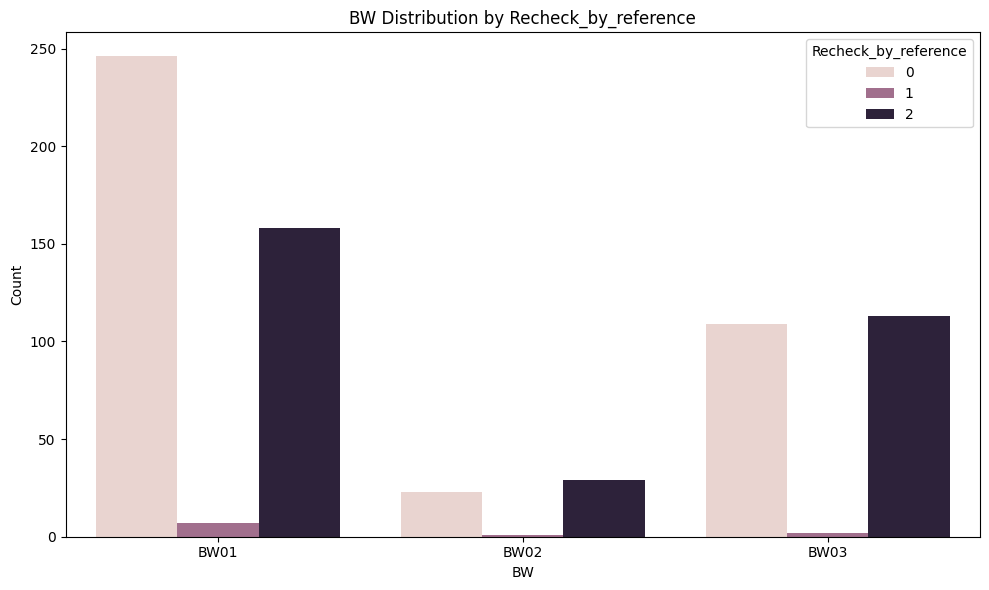

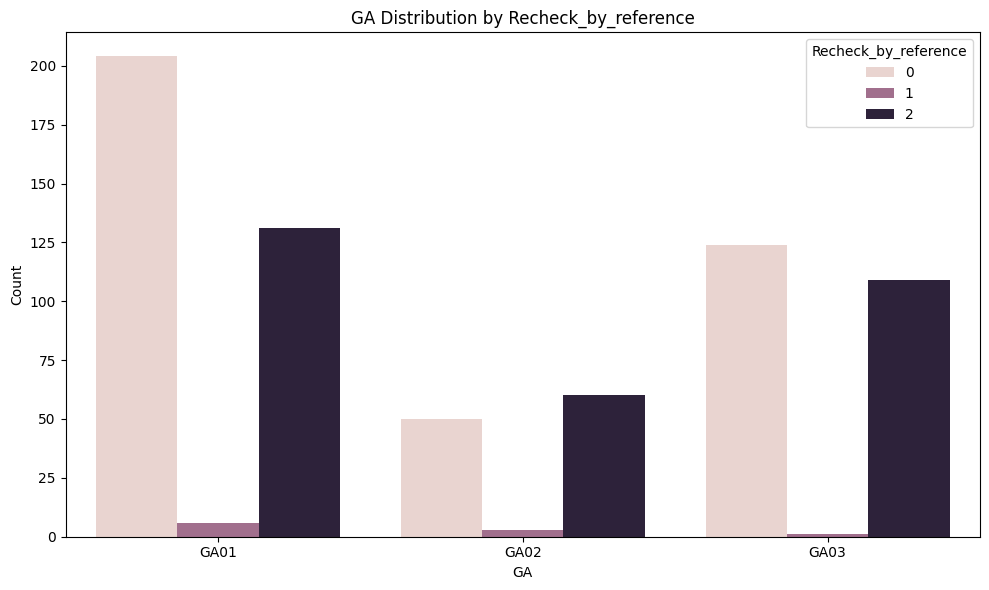

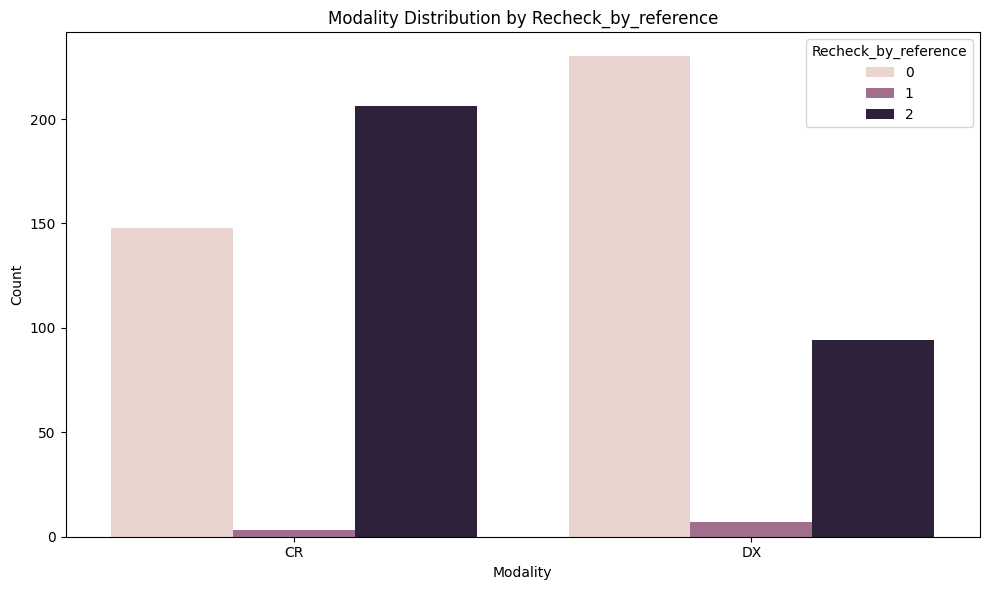

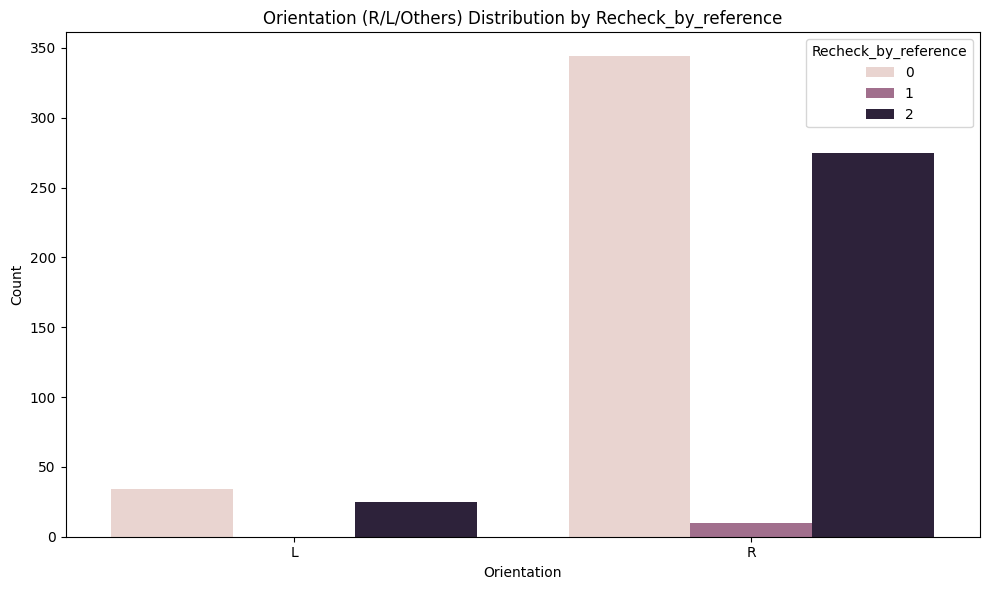

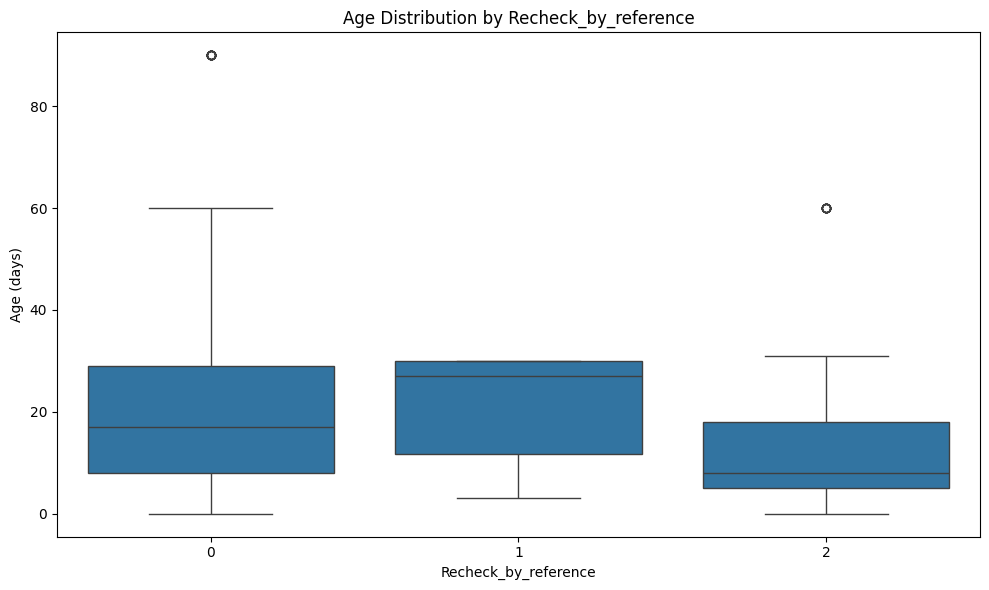

그래프가 터미널에 표시되었습니다.

프로그램이 성공적으로 완료되었습니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_path = r'\\192.168.45.125\forGPU2\yeonsu\0.Projects\Pneumoperitoneum\data\internal_data\Internal6.csv'

# CSV 파일 읽기
try:
    df = pd.read_csv(file_path)
    print(f"데이터셋을 성공적으로 불러왔습니다. 총 {len(df)}개의 행이 있습니다.")
except Exception as e:
    print(f"파일 로딩 중 오류 발생: {e}")
    print("파일 경로를 확인하거나 파일을 직접 업로드해주세요.")

# 데이터셋의 기본 정보 확인
print("\n--- 데이터셋 처음 5행 ---")
print(df.head())

print("\n--- 데이터셋 정보 ---")
print(df.info())

print("\n--- 기술 통계량 ---")
print(df.describe())

# 결측치 확인
print("\n--- 결측치 개수 ---")
print(df.isnull().sum())

# Orientation 변수 전처리 (R, L, Others로 그룹화)
def categorize_orientation(orientation):
    if pd.isna(orientation):
        return 'Others'
    elif str(orientation).upper().startswith('R'):
        return 'R'
    elif str(orientation).upper().startswith('L'):
        return 'L'
    else:
        return 'Others'

# Orientation 필드가 있다면 전처리 적용
if 'Orientation' in df.columns:
    df['Orientation_Group'] = df['Orientation'].apply(categorize_orientation)
    print("\nOrientation을 R, L, Others로 그룹화했습니다.")
    print(df['Orientation_Group'].value_counts())
else:
    print("\nOrientation 열이 없습니다. 데이터셋을 확인해주세요.")

# 클래스별 퍼센트 계산하는 교차표 함수
def create_contingency_table(df, row_var, col_var, display_percent=True, percent_by='row'):
    """
    카운트와 퍼센트를 포함한 교차표 생성
    
    매개변수:
    - df: DataFrame
    - row_var: 행 변수명
    - col_var: 열 변수명
    - display_percent: True일 경우, 괄호 안에 퍼센트 표시
    - percent_by: 'row'인 경우 행 합계 기준, 'all'인 경우 전체 합계 기준으로 퍼센트 계산
    
    반환값:
    - 교차표가 포함된 DataFrame
    """
    # 교차표 생성
    cont_table = pd.crosstab(df[row_var], df[col_var], margins=True, margins_name='Total')
    
    if display_percent:
        # 퍼센트 계산 방법에 따라 다르게 처리
        if percent_by == 'row':
            # 각 행 안에서의 퍼센트 계산 (각 클래스 내에서의 비율)
            percentage_table = pd.crosstab(df[row_var], df[col_var], normalize='index') * 100
        else:  # 'all'
            # 전체 합계 대비 퍼센트 계산
            percentage_table = pd.crosstab(df[row_var], df[col_var], normalize='all') * 100
        
        # 카운트와 퍼센트 결합
        result_table = cont_table.copy()
        
        # 마진을 제외한 모든 셀에 퍼센트 추가
        for row in cont_table.index[:-1]:
            for col in cont_table.columns[:-1]:
                count = cont_table.loc[row, col]
                if percent_by == 'row':
                    # 행 합계 대비 퍼센트
                    percentage = count / cont_table.loc[row, 'Total'] * 100
                else:
                    # 전체 합계 대비 퍼센트
                    percentage = percentage_table.loc[row, col]
                result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
        
        # 행 합계에 퍼센트 추가 (전체 대비)
        for row in cont_table.index[:-1]:
            count = cont_table.loc[row, 'Total']
            percentage = count / cont_table.loc['Total', 'Total'] * 100
            result_table.loc[row, 'Total'] = f"{count} ({percentage:.1f}%)"
        
        # 열 합계에 퍼센트 추가 (전체 대비)
        for col in cont_table.columns[:-1]:
            count = cont_table.loc['Total', col]
            percentage = count / cont_table.loc['Total', 'Total'] * 100
            result_table.loc['Total', col] = f"{count} ({percentage:.1f}%)"
        
        # 전체 합계는 항상 100%
        result_table.loc['Total', 'Total'] = f"{cont_table.loc['Total', 'Total']} (100.0%)"
        
        return result_table
    else:
        return cont_table

# 연령 통계 계산 함수 (평균 ± 표준편차)
def calculate_age_stats(df, age_col='Patient_Age_Days', group_col='Recheck_by_reference'):
    """
    그룹별 연령의 평균 및 표준편차 계산
    
    매개변수:
    - df: DataFrame
    - age_col: 연령 데이터 열 이름
    - group_col: 그룹화할 열 이름
    
    반환값:
    - 그룹별 평균 ± 표준편차가 포함된 DataFrame
    """
    # 전체 통계 계산
    overall_mean = df[age_col].mean()
    overall_std = df[age_col].std()
    
    # 그룹별 통계 계산
    stats = df.groupby(group_col)[age_col].agg(['mean', 'std']).reset_index()
    stats['formatted'] = stats.apply(lambda x: f"{x['mean']:.1f} ± {x['std']:.1f}", axis=1)
    
    # 전체 통계 추가
    total_row = pd.DataFrame({
        group_col: ['Total'],
        'mean': [overall_mean],
        'std': [overall_std],
        'formatted': [f"{overall_mean:.1f} ± {overall_std:.1f}"]
    })
    
    stats = pd.concat([stats, total_row], ignore_index=True)
    
    return stats

# 터미널에 그래프 표시 함수 (옆으로 나란히 막대 그래프 표시)
def display_plots(df):
    """
    데이터 시각화 그래프 생성 및 터미널에 표시
    
    매개변수:
    - df: DataFrame
    """
    # 1. Sex by Recheck_by_reference 시각화
    plt.figure(figsize=(10, 6))
    sex_counts = pd.crosstab(df['Patient_Sex_Final'], df['Recheck_by_reference'])
    
    # 옆으로 나란히 표시하기 위해 barplot 사용
    sex_melted = sex_counts.reset_index().melt(id_vars='Patient_Sex_Final', var_name='Recheck', value_name='Count')
    sns.barplot(x='Patient_Sex_Final', y='Count', hue='Recheck', data=sex_melted)
    
    plt.title('Sex Distribution by Recheck_by_reference')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.legend(title='Recheck_by_reference')
    plt.tight_layout()
    plt.show()
    
    # 2. BW by Recheck_by_reference 시각화
    plt.figure(figsize=(10, 6))
    bw_counts = pd.crosstab(df['BW'], df['Recheck_by_reference'])
    
    # 옆으로 나란히 표시하기 위해 barplot 사용
    bw_melted = bw_counts.reset_index().melt(id_vars='BW', var_name='Recheck', value_name='Count')
    sns.barplot(x='BW', y='Count', hue='Recheck', data=bw_melted)
    
    plt.title('BW Distribution by Recheck_by_reference')
    plt.xlabel('BW')
    plt.ylabel('Count')
    plt.legend(title='Recheck_by_reference')
    plt.tight_layout()
    plt.show()
    
    # 3. GA by Recheck_by_reference 시각화
    plt.figure(figsize=(10, 6))
    ga_counts = pd.crosstab(df['GA'], df['Recheck_by_reference'])
    
    # 옆으로 나란히 표시하기 위해 barplot 사용
    ga_melted = ga_counts.reset_index().melt(id_vars='GA', var_name='Recheck', value_name='Count')
    sns.barplot(x='GA', y='Count', hue='Recheck', data=ga_melted)
    
    plt.title('GA Distribution by Recheck_by_reference')
    plt.xlabel('GA')
    plt.ylabel('Count')
    plt.legend(title='Recheck_by_reference')
    plt.tight_layout()
    plt.show()
    
    # 4. Modality by Recheck_by_reference 시각화
    plt.figure(figsize=(10, 6))
    modality_recheck_counts = pd.crosstab(df['Modality'], df['Recheck_by_reference'])
    
    # 옆으로 나란히 표시하기 위해 barplot 사용
    modality_recheck_melted = modality_recheck_counts.reset_index().melt(
        id_vars='Modality', var_name='Recheck', value_name='Count')
    sns.barplot(x='Modality', y='Count', hue='Recheck', data=modality_recheck_melted)
    
    plt.title('Modality Distribution by Recheck_by_reference')
    plt.xlabel('Modality')
    plt.ylabel('Count')
    plt.legend(title='Recheck_by_reference')
    plt.tight_layout()
    plt.show()
    
    # 5. Orientation by Recheck_by_reference 시각화
    if 'Orientation_Group' in df.columns:
        plt.figure(figsize=(10, 6))
        orientation_recheck_counts = pd.crosstab(df['Orientation_Group'], df['Recheck_by_reference'])
        
        # 옆으로 나란히 표시하기 위해 barplot 사용
        orientation_recheck_melted = orientation_recheck_counts.reset_index().melt(
            id_vars='Orientation_Group', var_name='Recheck', value_name='Count')
        sns.barplot(x='Orientation_Group', y='Count', hue='Recheck', data=orientation_recheck_melted)
        
        plt.title('Orientation (R/L/Others) Distribution by Recheck_by_reference')
        plt.xlabel('Orientation')
        plt.ylabel('Count')
        plt.legend(title='Recheck_by_reference')
        plt.tight_layout()
        plt.show()
    
    # 6. Age by Recheck_by_reference 시각화
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Recheck_by_reference', y='Patient_Age_Days', data=df)
    plt.title('Age Distribution by Recheck_by_reference')
    plt.xlabel('Recheck_by_reference')
    plt.ylabel('Age (days)')
    plt.tight_layout()
    plt.show()
    
    # 7. Modality by Diagnosis 시각화
    # 진단 관련 열 이름 확인
    possible_diagnosis_columns = ['Diagnosis', 'Final_Diagnosis', 'Result', 'PP_Diagnosis']
    diagnosis_column = None
    for col in possible_diagnosis_columns:
        if col in df.columns:
            diagnosis_column = col
            break
    
    if diagnosis_column:
        plt.figure(figsize=(10, 6))
        modality_diagnosis_counts = pd.crosstab(df['Modality'], df[diagnosis_column])
        
        # 옆으로 나란히 표시하기 위해 barplot 사용
        modality_diagnosis_melted = modality_diagnosis_counts.reset_index().melt(
            id_vars='Modality', var_name='Diagnosis', value_name='Count')
        sns.barplot(x='Modality', y='Count', hue='Diagnosis', data=modality_diagnosis_melted)
        
        plt.title(f'Modality Distribution by {diagnosis_column}')
        plt.xlabel('Modality')
        plt.ylabel('Count')
        plt.legend(title=diagnosis_column)
        plt.tight_layout()
        plt.show()
    
    # 8. Orientation by Diagnosis 시각화
    if 'Orientation_Group' in df.columns and diagnosis_column:
        plt.figure(figsize=(10, 6))
        orientation_diagnosis_counts = pd.crosstab(df['Orientation_Group'], df[diagnosis_column])
        
        # 옆으로 나란히 표시하기 위해 barplot 사용
        orientation_diagnosis_melted = orientation_diagnosis_counts.reset_index().melt(
            id_vars='Orientation_Group', var_name='Diagnosis', value_name='Count')
        sns.barplot(x='Orientation_Group', y='Count', hue='Diagnosis', data=orientation_diagnosis_melted)
        
        plt.title(f'Orientation (R/L/Others) Distribution by {diagnosis_column}')
        plt.xlabel('Orientation')
        plt.ylabel('Count')
        plt.legend(title=diagnosis_column)
        plt.tight_layout()
        plt.show()
    
    print("그래프가 터미널에 표시되었습니다.")

# 테이블 1: Patient_Sex_Final, Patient_Age_Days, BW by Recheck_by_reference
print("\n--- 테이블 1: Demographics by Recheck_by_reference ---")
try:
    # 성별에 대한 교차표 (클래스 내 비율 계산)
    sex_table = create_contingency_table(df, 'Patient_Sex_Final', 'Recheck_by_reference', percent_by='row')
    print("\nPatient_Sex_Final by Recheck_by_reference:")
    print(sex_table)
    
    # BW(체중 카테고리)에 대한 교차표 (클래스 내 비율 계산)
    bw_table = create_contingency_table(df, 'BW', 'Recheck_by_reference', percent_by='row')
    print("\nBW by Recheck_by_reference:")
    print(bw_table)
    
    # GA에 대한 교차표 (클래스 내 비율 계산)
    ga_table = create_contingency_table(df, 'GA', 'Recheck_by_reference', percent_by='row')
    print("\nGA by Recheck_by_reference:")
    print(ga_table)
    
    # 연령에 대한 평균 및 표준편차
    print("\nPatient_Age_Days by Recheck_by_reference (Mean ± SD):")
    age_stats = calculate_age_stats(df, 'Patient_Age_Days', 'Recheck_by_reference')
    print(age_stats[['Recheck_by_reference', 'formatted']])
    
except Exception as e:
    print(f"테이블 1 생성 중 오류 발생: {e}")
    print("데이터셋의 열 이름과 일치하는지 확인해주세요.")
    print(f"데이터셋의 열 이름: {df.columns.tolist()}")

# 테이블 2: Modality and Orientation by Recheck_by_reference
print("\n--- 테이블 2: Modality and Orientation by Recheck_by_reference ---")
try:
    # Modality에 대한 교차표 (클래스 내 비율 계산)
    modality_recheck_table = create_contingency_table(df, 'Modality', 'Recheck_by_reference', percent_by='row')
    print("\nModality by Recheck_by_reference:")
    print(modality_recheck_table)
    
    # Orientation에 대한 교차표 (클래스 내 비율 계산)
    if 'Orientation_Group' in df.columns:
        orientation_recheck_table = create_contingency_table(df, 'Orientation_Group', 'Recheck_by_reference', percent_by='row')
        print("\nOrientation (R/L/Others) by Recheck_by_reference:")
        print(orientation_recheck_table)
    else:
        print("Orientation_Group 열이 생성되지 않았습니다.")
        
except Exception as e:
    print(f"테이블 2 생성 중 오류 발생: {e}")
    print("데이터셋의 열 이름과 일치하는지 확인해주세요.")

# 테이블 3: Modality and Orientation by Diagnosis
print("\n--- 테이블 3: Modality and Orientation by Diagnosis ---")
try:
    # 진단 관련 열 이름 확인
    possible_diagnosis_columns = ['Diagnosis', 'Final_Diagnosis', 'Result', 'PP_Diagnosis']
    
    diagnosis_column = None
    for col in possible_diagnosis_columns:
        if col in df.columns:
            diagnosis_column = col
            break
    
    if diagnosis_column is None:
        print("진단 관련 열을 찾을 수 없습니다. 데이터셋 열을 확인해주세요.")
        print(f"가능한 열 이름: {df.columns.tolist()}")
    else:
        # Modality에 대한 교차표 (클래스 내 비율 계산)
        modality_diagnosis_table = create_contingency_table(df, 'Modality', diagnosis_column, percent_by='row')
        print("\nModality by Diagnosis:")
        print(modality_diagnosis_table)
        
        # Orientation에 대한 교차표 (클래스 내 비율 계산)
        if 'Orientation_Group' in df.columns:
            orientation_diagnosis_table = create_contingency_table(df, 'Orientation_Group', diagnosis_column, percent_by='row')
            print("\nOrientation (R/L/Others) by Diagnosis:")
            print(orientation_diagnosis_table)
        else:
            print("Orientation_Group 열이 생성되지 않았습니다.")
except Exception as e:
    print(f"테이블 3 생성 중 오류 발생: {e}")
    print("데이터셋의 열 이름과 일치하는지 확인해주세요.")

# 시각화 그래프 생성 및 터미널에 표시
try:
    print("\n--- 데이터 시각화 그래프 생성 중 ---")
    display_plots(df)
except Exception as e:
    print(f"그래프 생성 중 오류 발생: {e}")

# # 테이블 값 쉽게 복사할 수 있도록 포맷팅
# print("\n--- 복사용 테이블 값 ---")

# try:
#     # 성별 테이블 값
#     print("\n[Patient_Sex_Final by Recheck_by_reference]")
#     for row in sex_table.index:
#         for col in sex_table.columns:
#             print(f"Sex_{row}_{col}: {sex_table.loc[row, col]}")

#     # BW 테이블 값
#     print("\n[BW by Recheck_by_reference]")
#     for row in bw_table.index:
#         for col in bw_table.columns:
#             print(f"BW_{row}_{col}: {bw_table.loc[row, col]}")

#     # GA 테이블 값
#     print("\n[GA by Recheck_by_reference]")
#     for row in ga_table.index:
#         for col in ga_table.columns:
#             print(f"GA_{row}_{col}: {ga_table.loc[row, col]}")

#     # 연령 통계 값
#     print("\n[Patient_Age_Days by Recheck_by_reference]")
#     for _, row in age_stats.iterrows():
#         group = row['Recheck_by_reference']
#         formatted = row['formatted']
#         print(f"Age_{group}: {formatted}")
        
#     # Modality by Recheck_by_reference 테이블 값
#     print("\n[Modality by Recheck_by_reference]")
#     for row in modality_recheck_table.index:
#         for col in modality_recheck_table.columns:
#             print(f"Modality_Recheck_{row}_{col}: {modality_recheck_table.loc[row, col]}")
    
#     # Orientation by Recheck_by_reference 테이블 값
#     if 'Orientation_Group' in df.columns:
#         print("\n[Orientation by Recheck_by_reference]")
#         for row in orientation_recheck_table.index:
#             for col in orientation_recheck_table.columns:
#                 print(f"Orientation_Recheck_{row}_{col}: {orientation_recheck_table.loc[row, col]}")

#     if diagnosis_column:
#         # Modality by Diagnosis 테이블 값
#         print("\n[Modality by Diagnosis]")
#         for row in modality_diagnosis_table.index:
#             for col in modality_diagnosis_table.columns:
#                 print(f"Modality_Diagnosis_{row}_{col}: {modality_diagnosis_table.loc[row, col]}")

#         # Orientation by Diagnosis 테이블 값
#         if 'Orientation_Group' in df.columns:
#             print("\n[Orientation by Diagnosis]")
#             for row in orientation_diagnosis_table.index:
#                 for col in orientation_diagnosis_table.columns:
#                     print(f"Orientation_Diagnosis_{row}_{col}: {orientation_diagnosis_table.loc[row, col]}")
# except Exception as e:
#     print(f"테이블 값 포맷팅 중 오류 발생: {e}")

# # 표를 ASCII 형태로 출력하는 함수
# def print_table_as_ascii(table, title):
#     print(f"\n--- {title} ---")
    
#     # 헤더 행 길이 계산
#     col_widths = {}
#     for col in table.columns:
#         col_widths[col] = max(len(str(col)), max(len(str(val)) for val in table[col]))
    
#     # 인덱스 열 길이 계산
#     idx_width = max(len('Index'), max(len(str(idx)) for idx in table.index))
    
#     # 헤더 출력
#     header = '|' + ' ' + 'Index'.ljust(idx_width) + ' |'
#     for col in table.columns:
#         header += ' ' + str(col).ljust(col_widths[col]) + ' |'
#     print(header)
    
#     # 구분선 출력
#     separator = '|' + '-' * (idx_width + 2) + '|'
#     for col in table.columns:
#         separator += '-' * (col_widths[col] + 2) + '|'
#     print(separator)
    
#     # 데이터 행 출력
#     for idx, row in table.iterrows():
#         row_str = '|' + ' ' + str(idx).ljust(idx_width) + ' |'
#         for col in table.columns:
#             row_str += ' ' + str(row[col]).ljust(col_widths[col]) + ' |'
#         print(row_str)

# print("\n\n--- ASCII 형식의 테이블 ---")
# print_table_as_ascii(sex_table, "Sex by Recheck_by_reference")
# print_table_as_ascii(bw_table, "BW by Recheck_by_reference")
# print_table_as_ascii(ga_table, "GA by Recheck_by_reference")

# # Age 통계 ASCII 형식으로 출력
# print("\n--- Age by Recheck_by_reference ---")
# # 열 너비 계산
# group_width = max(len('Group'), max(len(str(row['Recheck_by_reference'])) for _, row in age_stats.iterrows()))
# stats_width = max(len('Mean ± SD'), max(len(row['formatted']) for _, row in age_stats.iterrows()))

# # 헤더 출력
# print(f"| {'Group'.ljust(group_width)} | {'Mean ± SD'.ljust(stats_width)} |")
# print(f"| {'-' * group_width} | {'-' * stats_width} |")

# # 데이터 행 출력
# for _, row in age_stats.iterrows():
#     group = str(row['Recheck_by_reference'])
#     formatted = row['formatted']
#     print(f"| {group.ljust(group_width)} | {formatted.ljust(stats_width)} |")

# # 새로 추가된 테이블 출력
# print_table_as_ascii(modality_recheck_table, "Modality by Recheck_by_reference")
# if 'Orientation_Group' in df.columns:
#     print_table_as_ascii(orientation_recheck_table, "Orientation (R/L/Others) by Recheck_by_reference")

# if diagnosis_column:
#     print_table_as_ascii(modality_diagnosis_table, "Modality by Diagnosis")
#     if 'Orientation_Group' in df.columns:
#         print_table_as_ascii(orientation_diagnosis_table, "Orientation (R/L/Others) by Diagnosis")

print("\n프로그램이 성공적으로 완료되었습니다.")

### External Data

데이터셋을 성공적으로 불러왔습니다. 총 125개의 행이 있습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filename           125 non-null    object
 1   img_dcm            125 non-null    object
 2   png_path           125 non-null    object
 3   Width              125 non-null    int64 
 4   Height             125 non-null    int64 
 5   H                  125 non-null    int64 
 6   C                  125 non-null    int64 
 7   GA                 125 non-null    object
 8   BW                 125 non-null    object
 9   Pneumo ???         125 non-null    int64 
 10  Pneumo ???_by JYH  125 non-null    int64 
 11  Comments           5 non-null      object
 12  Consensus          125 non-null    int64 
 13  Binary_Label       125 non-null    int64 
 14  Modality           125 non-null    object
 15  png_filename       125 non-null    object
 16  Orienta

Consensus
0    84
2    38
1     3
Name: count, dtype: int64


Orientation을 R, L, Others로 그룹화했습니다.


Orientation_Group
R    73
L    52
Name: count, dtype: int64


BW by Consensus:


C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49 (66.2%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1 (1.4%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24 (32.4%)' has dtype incompatible with int64, please explicitly cast to a compatible dty

Consensus,0,1,2,Total
BW,,,,
BW01,49 (66.2%),1 (1.4%),24 (32.4%),74 (59.2%)
BW02,19 (70.4%),0 (0.0%),8 (29.6%),27 (21.6%)
BW03,16 (66.7%),2 (8.3%),6 (25.0%),24 (19.2%)
Total,84 (67.2%),3 (2.4%),38 (30.4%),125 (100.0%)


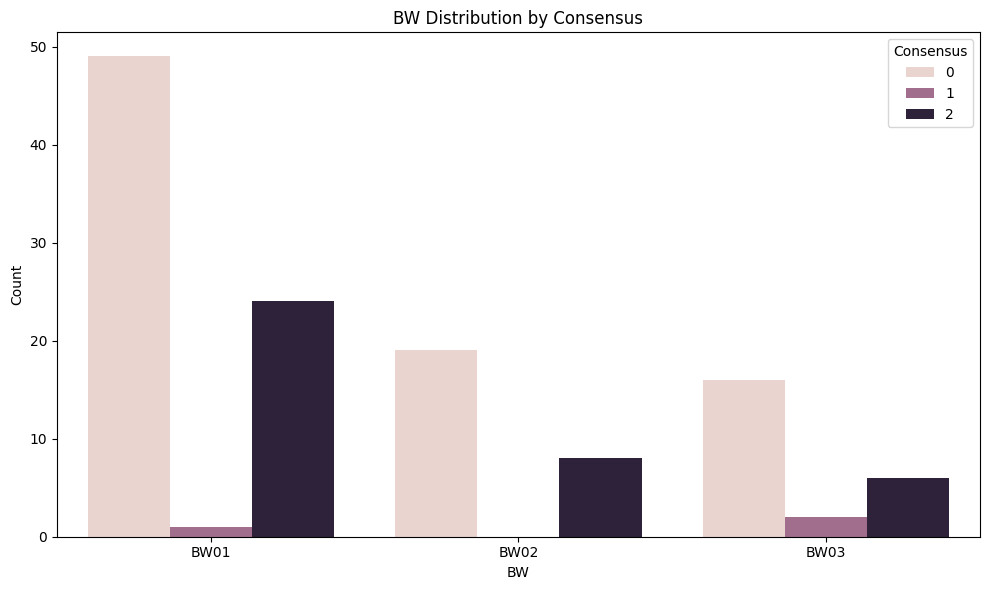


GA by Consensus:


C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '52 (66.7%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1 (1.3%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25 (32.1%)' has dtype incompatible with int64, please explicitly cast to a compatible dty

Consensus,0,1,2,Total
GA,,,,
GA01,52 (66.7%),1 (1.3%),25 (32.1%),78 (62.4%)
GA02,25 (73.5%),0 (0.0%),9 (26.5%),34 (27.2%)
GA03,7 (53.8%),2 (15.4%),4 (30.8%),13 (10.4%)
Total,84 (67.2%),3 (2.4%),38 (30.4%),125 (100.0%)


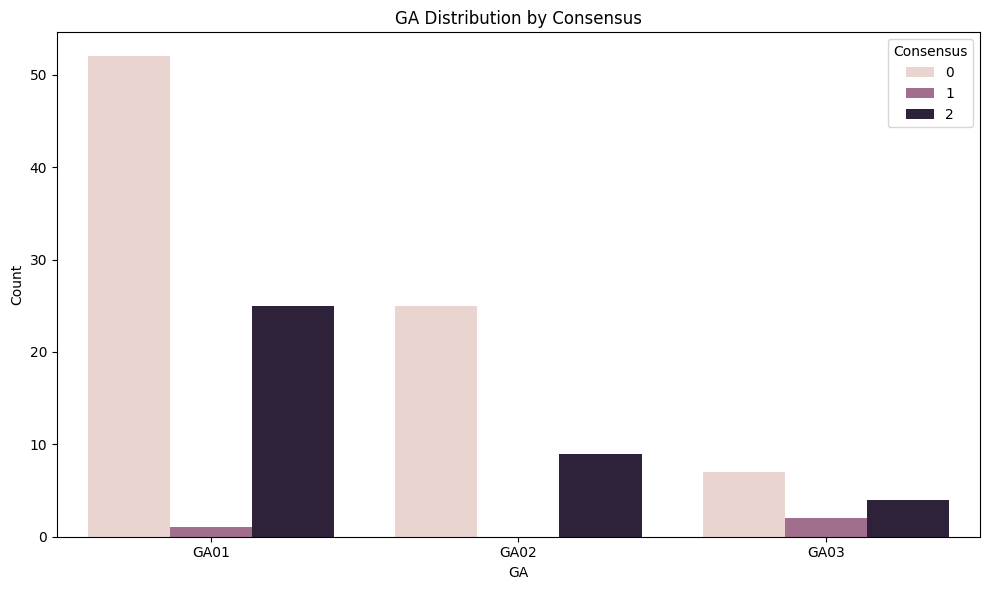


Modality by Consensus:


C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69 (66.3%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3 (2.9%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32 (30.8%)' has dtype incompatible with int64, please explicitly cast to a compatible dty

Consensus,0,1,2,Total
Modality,,,,
CR,69 (66.3%),3 (2.9%),32 (30.8%),104 (83.2%)
DX,15 (71.4%),0 (0.0%),6 (28.6%),21 (16.8%)
Total,84 (67.2%),3 (2.4%),38 (30.4%),125 (100.0%)


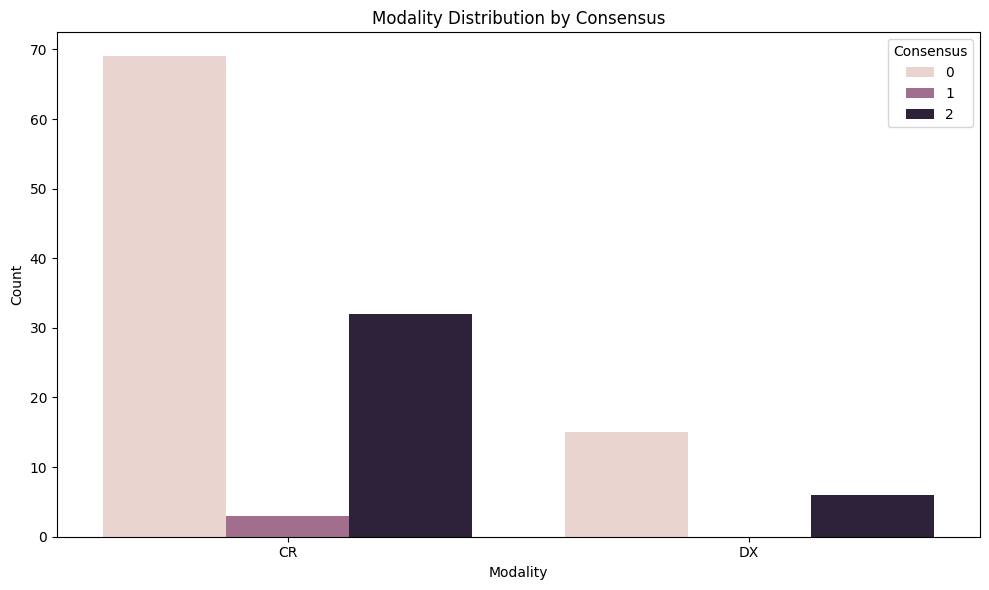


Orientation (R/L/Others) by Consensus:


C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34 (65.4%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3 (5.8%)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
C:\Users\smifa\AppData\Local\Temp\ipykernel_32132\4123767251.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15 (28.8%)' has dtype incompatible with int64, please explicitly cast to a compatible dty

Consensus,0,1,2,Total
Orientation_Group,,,,
L,34 (65.4%),3 (5.8%),15 (28.8%),52 (41.6%)
R,50 (68.5%),0 (0.0%),23 (31.5%),73 (58.4%)
Total,84 (67.2%),3 (2.4%),38 (30.4%),125 (100.0%)


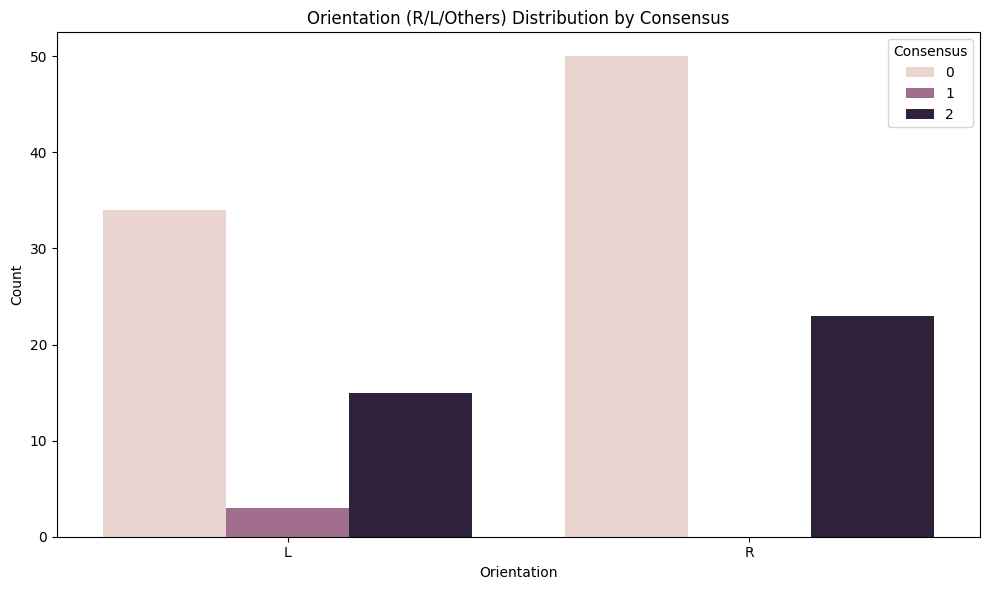


진단 관련 열을 찾을 수 없습니다. 데이터셋 열을 확인해주세요.
가능한 열 이름: ['filename', 'img_dcm', 'png_path', 'Width', 'Height', 'H', 'C', 'GA', 'BW', 'Pneumo ???', 'Pneumo ???_by JYH', 'Comments', 'Consensus', 'Binary_Label', 'Modality', 'png_filename', 'Orientation', 'comments', 'Orientation_Group']


In [2]:
# External5 데이터셋 분석
# Sex와 Age 제외, Consensus 컬럼 사용, 주피터 노트북용

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_path = r'\\192.168.45.125\forGPU2\yeonsu\0.Projects\Pneumoperitoneum\data\external_data\External5.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)
print(f"데이터셋을 성공적으로 불러왔습니다. 총 {len(df)}개의 행이 있습니다.")

# 데이터셋의 기본 정보 확인
df.head()

# 데이터셋 정보
df.info()

# 기술 통계량
df.describe()

# 결측치 확인
df.isnull().sum()

# Consensus 컬럼 확인
if 'Consensus' in df.columns:
    print("\nConsensus 값 분포:")
    display(df['Consensus'].value_counts())
else:
    print("\nConsensus 열이 없습니다. 데이터셋을 확인해주세요.")
    print(f"가능한 열 이름: {df.columns.tolist()}")

# Orientation 변수 전처리 (R, L, Others로 그룹화)
def categorize_orientation(orientation):
    if pd.isna(orientation):
        return 'Others'
    elif str(orientation).upper().startswith('R'):
        return 'R'
    elif str(orientation).upper().startswith('L'):
        return 'L'
    else:
        return 'Others'

# Orientation 필드가 있다면 전처리 적용
if 'Orientation' in df.columns:
    df['Orientation_Group'] = df['Orientation'].apply(categorize_orientation)
    print("\nOrientation을 R, L, Others로 그룹화했습니다.")
    display(df['Orientation_Group'].value_counts())
else:
    print("\nOrientation 열이 없습니다. 데이터셋을 확인해주세요.")

# 클래스별 퍼센트 계산하는 교차표 함수
def create_contingency_table(df, row_var, col_var, display_percent=True, percent_by='row'):
    """
    카운트와 퍼센트를 포함한 교차표 생성
    
    매개변수:
    - df: DataFrame
    - row_var: 행 변수명
    - col_var: 열 변수명
    - display_percent: True일 경우, 괄호 안에 퍼센트 표시
    - percent_by: 'row'인 경우 행 합계 기준, 'all'인 경우 전체 합계 기준으로 퍼센트 계산
    
    반환값:
    - 교차표가 포함된 DataFrame
    """
    # 교차표 생성
    cont_table = pd.crosstab(df[row_var], df[col_var], margins=True, margins_name='Total')
    
    if display_percent:
        # 퍼센트 계산 방법에 따라 다르게 처리
        if percent_by == 'row':
            # 각 행 안에서의 퍼센트 계산 (각 클래스 내에서의 비율)
            percentage_table = pd.crosstab(df[row_var], df[col_var], normalize='index') * 100
        else:  # 'all'
            # 전체 합계 대비 퍼센트 계산
            percentage_table = pd.crosstab(df[row_var], df[col_var], normalize='all') * 100
        
        # 카운트와 퍼센트 결합
        result_table = cont_table.copy()
        
        # 마진을 제외한 모든 셀에 퍼센트 추가
        for row in cont_table.index[:-1]:
            for col in cont_table.columns[:-1]:
                count = cont_table.loc[row, col]
                if percent_by == 'row':
                    # 행 합계 대비 퍼센트
                    percentage = count / cont_table.loc[row, 'Total'] * 100
                else:
                    # 전체 합계 대비 퍼센트
                    percentage = percentage_table.loc[row, col]
                result_table.loc[row, col] = f"{count} ({percentage:.1f}%)"
        
        # 행 합계에 퍼센트 추가 (전체 대비)
        for row in cont_table.index[:-1]:
            count = cont_table.loc[row, 'Total']
            percentage = count / cont_table.loc['Total', 'Total'] * 100
            result_table.loc[row, 'Total'] = f"{count} ({percentage:.1f}%)"
        
        # 열 합계에 퍼센트 추가 (전체 대비)
        for col in cont_table.columns[:-1]:
            count = cont_table.loc['Total', col]
            percentage = count / cont_table.loc['Total', 'Total'] * 100
            result_table.loc['Total', col] = f"{count} ({percentage:.1f}%)"
        
        # 전체 합계는 항상 100%
        result_table.loc['Total', 'Total'] = f"{cont_table.loc['Total', 'Total']} (100.0%)"
        
        return result_table
    else:
        return cont_table

# 1. BW by Consensus 분석
if 'BW' in df.columns and 'Consensus' in df.columns:
    bw_table = create_contingency_table(df, 'BW', 'Consensus', percent_by='row')
    print("\nBW by Consensus:")
    display(bw_table)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    bw_counts = pd.crosstab(df['BW'], df['Consensus'])
    bw_melted = bw_counts.reset_index().melt(id_vars='BW', var_name='Consensus', value_name='Count')
    sns.barplot(x='BW', y='Count', hue='Consensus', data=bw_melted)
    plt.title('BW Distribution by Consensus')
    plt.xlabel('BW')
    plt.ylabel('Count')
    plt.legend(title='Consensus')
    plt.tight_layout()
    plt.show()

# 2. GA by Consensus 분석
if 'GA' in df.columns and 'Consensus' in df.columns:
    ga_table = create_contingency_table(df, 'GA', 'Consensus', percent_by='row')
    print("\nGA by Consensus:")
    display(ga_table)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    ga_counts = pd.crosstab(df['GA'], df['Consensus'])
    ga_melted = ga_counts.reset_index().melt(id_vars='GA', var_name='Consensus', value_name='Count')
    sns.barplot(x='GA', y='Count', hue='Consensus', data=ga_melted)
    plt.title('GA Distribution by Consensus')
    plt.xlabel('GA')
    plt.ylabel('Count')
    plt.legend(title='Consensus')
    plt.tight_layout()
    plt.show()

# 3. Modality by Consensus 분석
if 'Modality' in df.columns and 'Consensus' in df.columns:
    modality_consensus_table = create_contingency_table(df, 'Modality', 'Consensus', percent_by='row')
    print("\nModality by Consensus:")
    display(modality_consensus_table)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    modality_consensus_counts = pd.crosstab(df['Modality'], df['Consensus'])
    modality_consensus_melted = modality_consensus_counts.reset_index().melt(
        id_vars='Modality', var_name='Consensus', value_name='Count')
    sns.barplot(x='Modality', y='Count', hue='Consensus', data=modality_consensus_melted)
    plt.title('Modality Distribution by Consensus')
    plt.xlabel('Modality')
    plt.ylabel('Count')
    plt.legend(title='Consensus')
    plt.tight_layout()
    plt.show()

# 4. Orientation by Consensus 분석
if 'Orientation_Group' in df.columns and 'Consensus' in df.columns:
    orientation_consensus_table = create_contingency_table(df, 'Orientation_Group', 'Consensus', percent_by='row')
    print("\nOrientation (R/L/Others) by Consensus:")
    display(orientation_consensus_table)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    orientation_consensus_counts = pd.crosstab(df['Orientation_Group'], df['Consensus'])
    orientation_consensus_melted = orientation_consensus_counts.reset_index().melt(
        id_vars='Orientation_Group', var_name='Consensus', value_name='Count')
    sns.barplot(x='Orientation_Group', y='Count', hue='Consensus', data=orientation_consensus_melted)
    plt.title('Orientation (R/L/Others) Distribution by Consensus')
    plt.xlabel('Orientation')
    plt.ylabel('Count')
    plt.legend(title='Consensus')
    plt.tight_layout()
    plt.show()

# 5. Modality and Orientation by Diagnosis 분석
# 진단 관련 열 이름 확인
possible_diagnosis_columns = ['Diagnosis', 'Final_Diagnosis', 'Result', 'PP_Diagnosis']
diagnosis_column = None
for col in possible_diagnosis_columns:
    if col in df.columns:
        diagnosis_column = col
        break

if diagnosis_column:
    # Modality에 대한 교차표 (클래스 내 비율 계산)
    modality_diagnosis_table = create_contingency_table(df, 'Modality', diagnosis_column, percent_by='row')
    print(f"\nModality by {diagnosis_column}:")
    display(modality_diagnosis_table)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    modality_diagnosis_counts = pd.crosstab(df['Modality'], df[diagnosis_column])
    modality_diagnosis_melted = modality_diagnosis_counts.reset_index().melt(
        id_vars='Modality', var_name='Diagnosis', value_name='Count')
    sns.barplot(x='Modality', y='Count', hue='Diagnosis', data=modality_diagnosis_melted)
    plt.title(f'Modality Distribution by {diagnosis_column}')
    plt.xlabel('Modality')
    plt.ylabel('Count')
    plt.legend(title=diagnosis_column)
    plt.tight_layout()
    plt.show()
    
    # Orientation에 대한 교차표 (클래스 내 비율 계산)
    if 'Orientation_Group' in df.columns:
        orientation_diagnosis_table = create_contingency_table(df, 'Orientation_Group', diagnosis_column, percent_by='row')
        print(f"\nOrientation (R/L/Others) by {diagnosis_column}:")
        display(orientation_diagnosis_table)
        
        # 시각화
        plt.figure(figsize=(10, 6))
        orientation_diagnosis_counts = pd.crosstab(df['Orientation_Group'], df[diagnosis_column])
        orientation_diagnosis_melted = orientation_diagnosis_counts.reset_index().melt(
            id_vars='Orientation_Group', var_name='Diagnosis', value_name='Count')
        sns.barplot(x='Orientation_Group', y='Count', hue='Diagnosis', data=orientation_diagnosis_melted)
        plt.title(f'Orientation (R/L/Others) Distribution by {diagnosis_column}')
        plt.xlabel('Orientation')
        plt.ylabel('Count')
        plt.legend(title=diagnosis_column)
        plt.tight_layout()
        plt.show()
else:
    print("\n진단 관련 열을 찾을 수 없습니다. 데이터셋 열을 확인해주세요.")
    print(f"가능한 열 이름: {df.columns.tolist()}")

# # 테이블 값 쉽게 복사할 수 있도록 포맷팅
# print("\n--- 복사용 테이블 값 ---")

# try:
#     # BW 테이블 값
#     if 'BW' in df.columns and 'Consensus' in df.columns:
#         print("\n[BW by Consensus]")
#         for row in bw_table.index:
#             for col in bw_table.columns:
#                 print(f"BW_{row}_{col}: {bw_table.loc[row, col]}")

#     # GA 테이블 값
#     if 'GA' in df.columns and 'Consensus' in df.columns:
#         print("\n[GA by Consensus]")
#         for row in ga_table.index:
#             for col in ga_table.columns:
#                 print(f"GA_{row}_{col}: {ga_table.loc[row, col]}")
        
#     # Modality by Consensus 테이블 값
#     if 'Modality' in df.columns and 'Consensus' in df.columns:
#         print("\n[Modality by Consensus]")
#         for row in modality_consensus_table.index:
#             for col in modality_consensus_table.columns:
#                 print(f"Modality_Consensus_{row}_{col}: {modality_consensus_table.loc[row, col]}")
    
#     # Orientation by Consensus 테이블 값
#     if 'Orientation_Group' in df.columns and 'Consensus' in df.columns:
#         print("\n[Orientation by Consensus]")
#         for row in orientation_consensus_table.index:
#             for col in orientation_consensus_table.columns:
#                 print(f"Orientation_Consensus_{row}_{col}: {orientation_consensus_table.loc[row, col]}")

#     if diagnosis_column:
#         # Modality by Diagnosis 테이블 값
#         print(f"\n[Modality by {diagnosis_column}]")
#         for row in modality_diagnosis_table.index:
#             for col in modality_diagnosis_table.columns:
#                 print(f"Modality_Diagnosis_{row}_{col}: {modality_diagnosis_table.loc[row, col]}")

#         # Orientation by Diagnosis 테이블 값
#         if 'Orientation_Group' in df.columns:
#             print(f"\n[Orientation by {diagnosis_column}]")
#             for row in orientation_diagnosis_table.index:
#                 for col in orientation_diagnosis_table.columns:
#                     print(f"Orientation_Diagnosis_{row}_{col}: {orientation_diagnosis_table.loc[row, col]}")
# except Exception as e:
    # print(f"테이블 값 포맷팅 중 오류 발생: {e}")